In [1]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import os
import DiadFit as pf
import datetime

In [2]:
# Charlotte collected this data on June 7th, 0.56 g/cm3 to 1.05 g/cm3
input_file_path=os.getcwd()+'\Input_files'
HPjune_data_path=input_file_path+'/'+"merged_df_wrho-6-7-23.xlsx"

hpjune=pd.read_excel(HPjune_data_path)
hpjune=hpjune.drop(columns=[col for col in hpjune.columns if 'Unnamed' in col])
hpjune['HB_Ratio']=(hpjune['HB2_Area']+hpjune['HB1_Area'])/(hpjune['Diad2_Voigt_Area']+hpjune['Diad1_Voigt_Area'])
hpjune.head()



,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,filename_split,T_C_mean,T_C_std,rho_gmL,1117_1447_old,1117_1447_new,1220_1447_new,1220_1400_new,1117_1400_new,HB_Ratio
0,FDCA-P1-1,0.648713,310.15,1.040000,64.871318,66.4600,36.970,36.970,36.970,36.970,...,FDCA-P1,36.9700,0.000000,1.043839,0.997595,0.997595,0.997263,1.002603,0.997336,0.114442
1,FDCA-P1-2,NaN,NaN,NaN,NaN,66.4600,36.970,36.970,36.970,36.970,...,FDCA-P1,36.9700,0.000000,1.043831,0.997594,0.997594,0.997262,1.002602,0.997335,0.113775
2,FDCA-P1-3,NaN,NaN,NaN,NaN,66.4600,36.970,36.970,36.970,36.970,...,FDCA-P1,36.9700,0.000000,1.043820,0.997594,0.997594,0.997262,1.002602,0.997335,0.114532
3,FDCA-P2-1,0.592398,310.15,1.025959,59.239802,60.1811,36.974,36.975,36.976,36.976,...,FDCA-P2,36.9754,0.000894,1.028451,0.997588,0.997588,0.997256,1.002594,0.997327,0.114683
4,FDCA-P2-2,NaN,NaN,NaN,NaN,60.1815,36.976,36.977,36.978,36.979,...,FDCA-P2,36.9778,0.001304,1.028444,0.997587,0.997587,0.997256,1.002594,0.997326,0.115199


In [3]:
# Charlotte collected this data on June 8th, 0.22-0.66 g/cm3. Its the new high pressure sensor, 
# so shows less extreme curves, but still some curve. 
MPjune_HPsens_data_path=input_file_path+'/'+"merged_df_wrho-6-8-23.xlsx"


mpjune_hpsens=pd.read_excel(MPjune_HPsens_data_path)
mpjune_hpsens=mpjune_hpsens.drop(columns=[col for col in mpjune_hpsens.columns if 'Unnamed' in col])
mpjune_hpsens['HB_Ratio']=(mpjune_hpsens['HB2_Area']+mpjune_hpsens['HB1_Area'])/(mpjune_hpsens['Diad2_Voigt_Area']+mpjune_hpsens['Diad1_Voigt_Area'])
mpjune_hpsens.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,filename_split,T_C_mean,T_C_std,rho_gmL,1117_1447_old,1117_1447_new,1220_1447_new,1220_1400_new,1117_1400_new,HB_Ratio
0,FDCA-P28-1,0.095909,310.15,0.660905,9.590924,9.6752,36.975,36.976,36.976,36.976,...,58 FDCA-P28,36.9756,0.000548,0.666442,0.997535,0.997535,0.997188,1.002531,0.997279,0.130649
1,FDCA-P29-1,0.093876,310.15,0.646865,9.387566,9.4594,37.002,37.003,37.003,37.003,...,56 FDCA-P29,37.0028,0.000447,0.635696,0.997536,0.997536,0.997192,1.002530,0.997279,0.133692
2,FDCA-P30-1,0.092172,310.15,0.632824,9.217169,9.2497,36.978,36.980,36.981,36.982,...,55 FDCA-P30,36.9808,0.001924,0.636492,0.997536,0.997536,0.997192,1.002530,0.997279,0.130422
3,FDCA-P31-1,0.090746,310.15,0.618784,9.074609,9.0269,36.995,36.994,36.993,36.993,...,53 FDCA-P31,36.9932,0.001483,0.613721,0.997537,0.997537,0.997196,1.002531,0.997280,0.133847
4,FDCA-P32-1,0.089553,310.15,0.604743,8.955350,8.9823,37.015,37.015,37.015,37.016,...,52 FDCA-P32,37.0156,0.000894,0.607595,0.997537,0.997538,0.997197,1.002531,0.997280,0.135589


In [4]:
# This data was collected on June 1st and 2nd by Penny Wieser, using the new low P sensor, 
# densities ranging from 0.009 to 0.68 g/cm3 (because sensor tops out at 10 MPa)
# Day 1 was 0.2-0.68, Day 2 (June 2nd) was very low densities. 
PW_data_path=input_file_path+'/'+"merged_df_wrho_PWdata.xlsx"

lpmpjune=pd.read_excel(PW_data_path)
lpmpjune=lpmpjune.drop(columns=[col for col in lpmpjune.columns if 'Unnamed' in col])
lpmpjune['Corr_Split_1σ_val']=lpmpjune['Corr_Split+1σ']-lpmpjune['Corrected_Splitting']
lpmpjune['HB_Ratio']=(lpmpjune['HB2_Area']+lpmpjune['HB1_Area'])/(lpmpjune['Diad2_Voigt_Area']+lpmpjune['Diad1_Voigt_Area'])

lpmpjune.head()


,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,...,AvP_Manuel,rho_gmL,filename_x.1,Ne_corr_fact_old_1447_1117,Ne_corr_fact_1447_1117_V77,1220_1447_new,1220_1400_new,1117_1400_new,Corr_Split_1σ_val,HB_Ratio
0,104.317427,104.319067,104.315787,12 C6_CRR_DiadFit,104.569330,0.002040,0.001474,1282.899792,0.001234,8503.996689,...,10.09850,0.687860,12 C6_CRR_DiadFit,0.997591,0.997592,0.997239,1.002552,0.997290,0.001640,0.110024
1,104.253899,104.255586,104.252212,14 C7_CRR_DiadFit,104.506344,0.002089,0.001527,1283.055183,0.001320,4159.640332,...,9.45820,0.652035,14 C7_CRR_DiadFit,0.997584,0.997585,0.997233,1.002546,0.997285,0.001687,0.109616
2,104.191284,104.193021,104.189548,16 C8,104.444319,0.002222,0.001583,1283.206389,0.001248,2439.022384,...,9.09595,0.621071,16 C8,0.997577,0.997578,0.997228,1.002543,0.997282,0.001736,0.116723
3,104.187881,104.189711,104.186050,17 C9,104.441140,0.002336,0.001687,1283.204984,0.001410,2470.540943,...,9.10230,0.621495,17 C9,0.997575,0.997576,0.997226,1.002540,0.997280,0.001831,0.108611
4,104.039708,104.041630,104.037786,19 C10,104.293657,0.002524,0.001787,1283.523492,0.001324,2413.101156,...,8.63880,0.548014,19 C10,0.997565,0.997566,0.997218,1.002530,0.997271,0.001922,0.107349


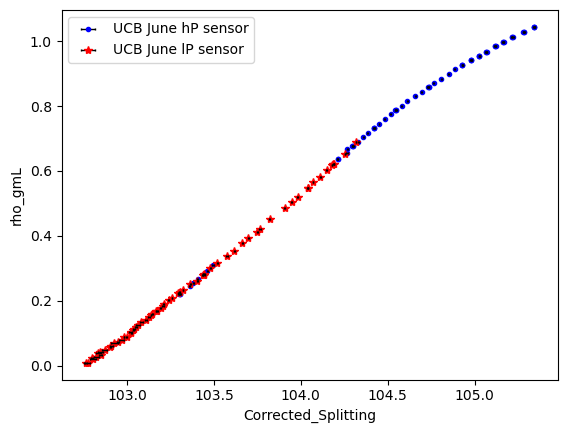

In [5]:
# Filter out bad ones from the high pressure sensor and concatenate the frames 
test=mpjune_hpsens.drop(columns=['Offset','filename_merge'])
hpsens_june=pd.concat([test,hpjune])

cali_pts_hpsens=hpsens_june[~(hpsens_june['rho_gmL'].between(0.325,0.63))]

# Filter out bad ones from low pressure sensor and concat frames
lpsens_june=lpmpjune.copy()
cali_pts_lpsens=lpsens_june[~(lpsens_june['rho_gmL'].between(0.46,0.48))]
cali_pts_lpsens = cali_pts_lpsens.replace([np.inf, -np.inf], np.nan)

cali_pts_lpsens = cali_pts_lpsens.dropna(subset=['rho_gmL'])

fig,ax=plt.subplots()

x='Corrected_Splitting'
y='rho_gmL'
y_pw='rho_gmL'


ax.errorbar(x=cali_pts_hpsens[x],y=cali_pts_hpsens[y], xerr=cali_pts_hpsens['Corr_Split_1σ_val'], fmt='.',
             color='blue',mfc='blue', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June hP sensor')


ax.errorbar(x=cali_pts_lpsens[x],y=cali_pts_lpsens[y_pw], xerr=cali_pts_lpsens['Corr_Split_1σ_val'], fmt='*',
             color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June lP sensor')

ax.set_xlabel(x)
ax.set_ylabel(y)

plt.legend()


plt.show()

In [6]:
full=pd.concat([pd.DataFrame(data={'Split':cali_pts_hpsens[x],'rho':cali_pts_hpsens[y],'spliterr':cali_pts_hpsens['Corr_Split_1σ_val']}),
                pd.DataFrame(data={'Split':cali_pts_lpsens[x],'rho':cali_pts_lpsens[y_pw],'spliterr':cali_pts_lpsens['Corr_Split_1σ_val']})])
full_sort=full.sort_values('rho')
# plt.scatter(full_sort['Split'],full_sort['rho'])

In [7]:
cali_pts_hpsens['power (mW)']

0     34.002
1     33.916
2     33.929
24    34.233
25    34.406
       ...  
49    34.008
50    33.997
51    34.000
52    34.029
53    34.006
Name: power (mW), Length: 66, dtype: float64

In [8]:
full_HB=pd.concat([pd.DataFrame(data={'Split':cali_pts_hpsens[x],'rho':cali_pts_hpsens[y],'HB_Ratio':cali_pts_hpsens['HB_Ratio'],
                                      'power (mW)':cali_pts_hpsens['power (mW)']
                                      }),
                pd.DataFrame(data={'Split':cali_pts_lpsens[x],'rho':cali_pts_lpsens[y_pw],'HB_Ratio':cali_pts_lpsens['HB_Ratio'],
                                   'power (mW)':cali_pts_lpsens['power (mW)']
                                   
                                   })])
full_HB_sort=full_HB.sort_values('rho')
# plt.scatter(full_sort['Split'],full_sort['rho'])

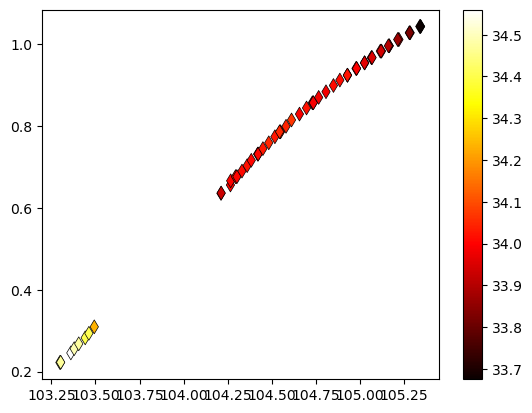

In [9]:
#plt.plot(full_HB_sort['Split'], full_HB_sort['rho'], '.r')

s=plt.scatter(full_HB_sort['Split'], full_HB_sort['rho'], marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=full_HB_sort['power (mW)'], cmap='hot')
fig.colorbar(s)

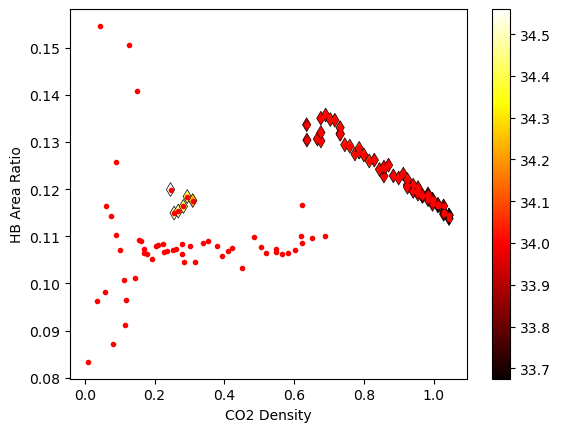

In [10]:
plt.plot(full_HB_sort['rho'], full_HB_sort['HB_Ratio'], '.r')
plt.xlabel('CO2 Density')
plt.ylabel('HB Area Ratio')

s=plt.scatter(full_HB_sort['rho'], full_HB_sort['HB_Ratio'], marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=full_HB_sort['power (mW)'], cmap='hot')
fig.colorbar(s)


In [11]:
full_HB_sort.to_excel('Hotband_cali.xlsx')

In [12]:
full_HB_sort

,Split,rho,HB_Ratio,power (mW)
56,102.773358,0.009599,NaN,NaN
62,102.762360,0.009822,0.083344,NaN
55,102.803922,0.020584,NaN,NaN
61,102.798145,0.023385,NaN,NaN
54,102.823215,0.028575,NaN,NaN
...,...,...,...,...
4,105.279822,1.028444,0.115199,33.832
3,105.281586,1.028451,0.114683,33.825
2,105.342879,1.043820,0.114532,33.689
1,105.343871,1.043831,0.113775,33.688


In [ ]:
C:\Users\penny\Box\Berkeley_new\DiadFit_outer\docs\UCB_Densimeter_fitting\Hotband_cali.xlsx

In [ ]:
Split_col='Split'
CO2_dens_col='rho'
split_error='spliterr'
CO2_dens_error=0.01
save_suffix='UCB_1117_1447'
eq_division='ccmr'


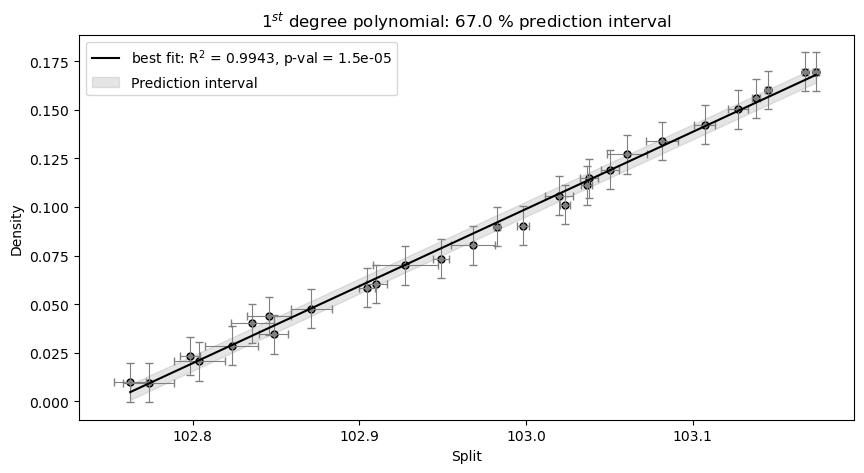

In [ ]:
CI=0.67
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort, Split_col=Split_col, CO2_dens_col=CO2_dens_col, 
split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Low',N_poly=1, CI=CI, 
std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)


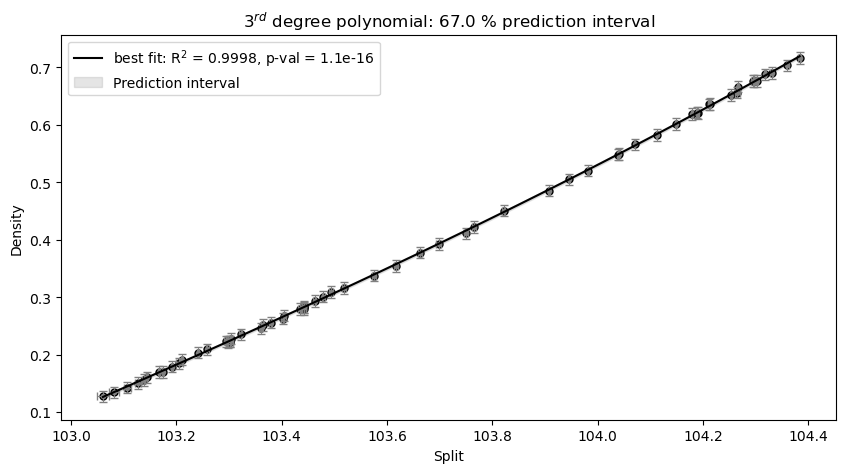

In [ ]:
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort,Split_col=Split_col, CO2_dens_col=CO2_dens_col, 
split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Medium',N_poly=3, CI=CI, 
std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)


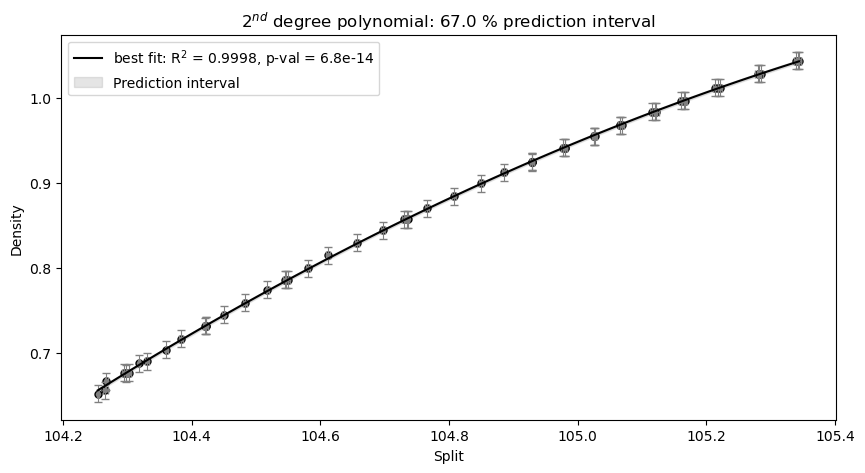

In [ ]:
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort, Split_col=Split_col, CO2_dens_col=CO2_dens_col, 
split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='High',N_poly=2, CI=CI, 
std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)

In [ ]:
full_sort

,Split,rho,spliterr
56,102.773358,0.009599,0.015294
62,102.762360,0.009822,0.009489
55,102.803922,0.020584,0.015494
61,102.798145,0.023385,0.006127
54,102.823215,0.028575,0.016037
...,...,...,...
4,105.279822,1.028444,0.003500
3,105.281586,1.028451,0.003393
2,105.342879,1.043820,0.003604
1,105.343871,1.043831,0.003450


In [ ]:

    # This gets the densimeter at low density
        pickle_str_lowr='Lowrho_polyfit_dataUCB_1220_1447.pkl'
        with open(DiadFit_dir/pickle_str_lowr, 'rb') as f:
            lowrho_pickle_data = pickle.load(f)

        # This gets the densimeter at medium density
        pickle_str_medr='Mediumrho_polyfit_dataUCB_1220_1447.pkl'
        with open(DiadFit_dir/pickle_str_medr, 'rb') as f:
            medrho_pickle_data = pickle.load(f)
        # This gets the densimeter at high density.
        pickle_str_highr='Highrho_polyfit_dataUCB_1220_1447.pkl'
        with open(DiadFit_dir/pickle_str_highr, 'rb') as f:
            highrho_pickle_data = pickle.load(f)

IndentationError: unexpected indent (1070283516.py, line 2)